In [2]:
import numpy as np
import json, math, random
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#df_compact = pd.read_csv('dataset_vcr_compact.csv')
df = pd.read_csv('dataset_vcr_expanded.csv')

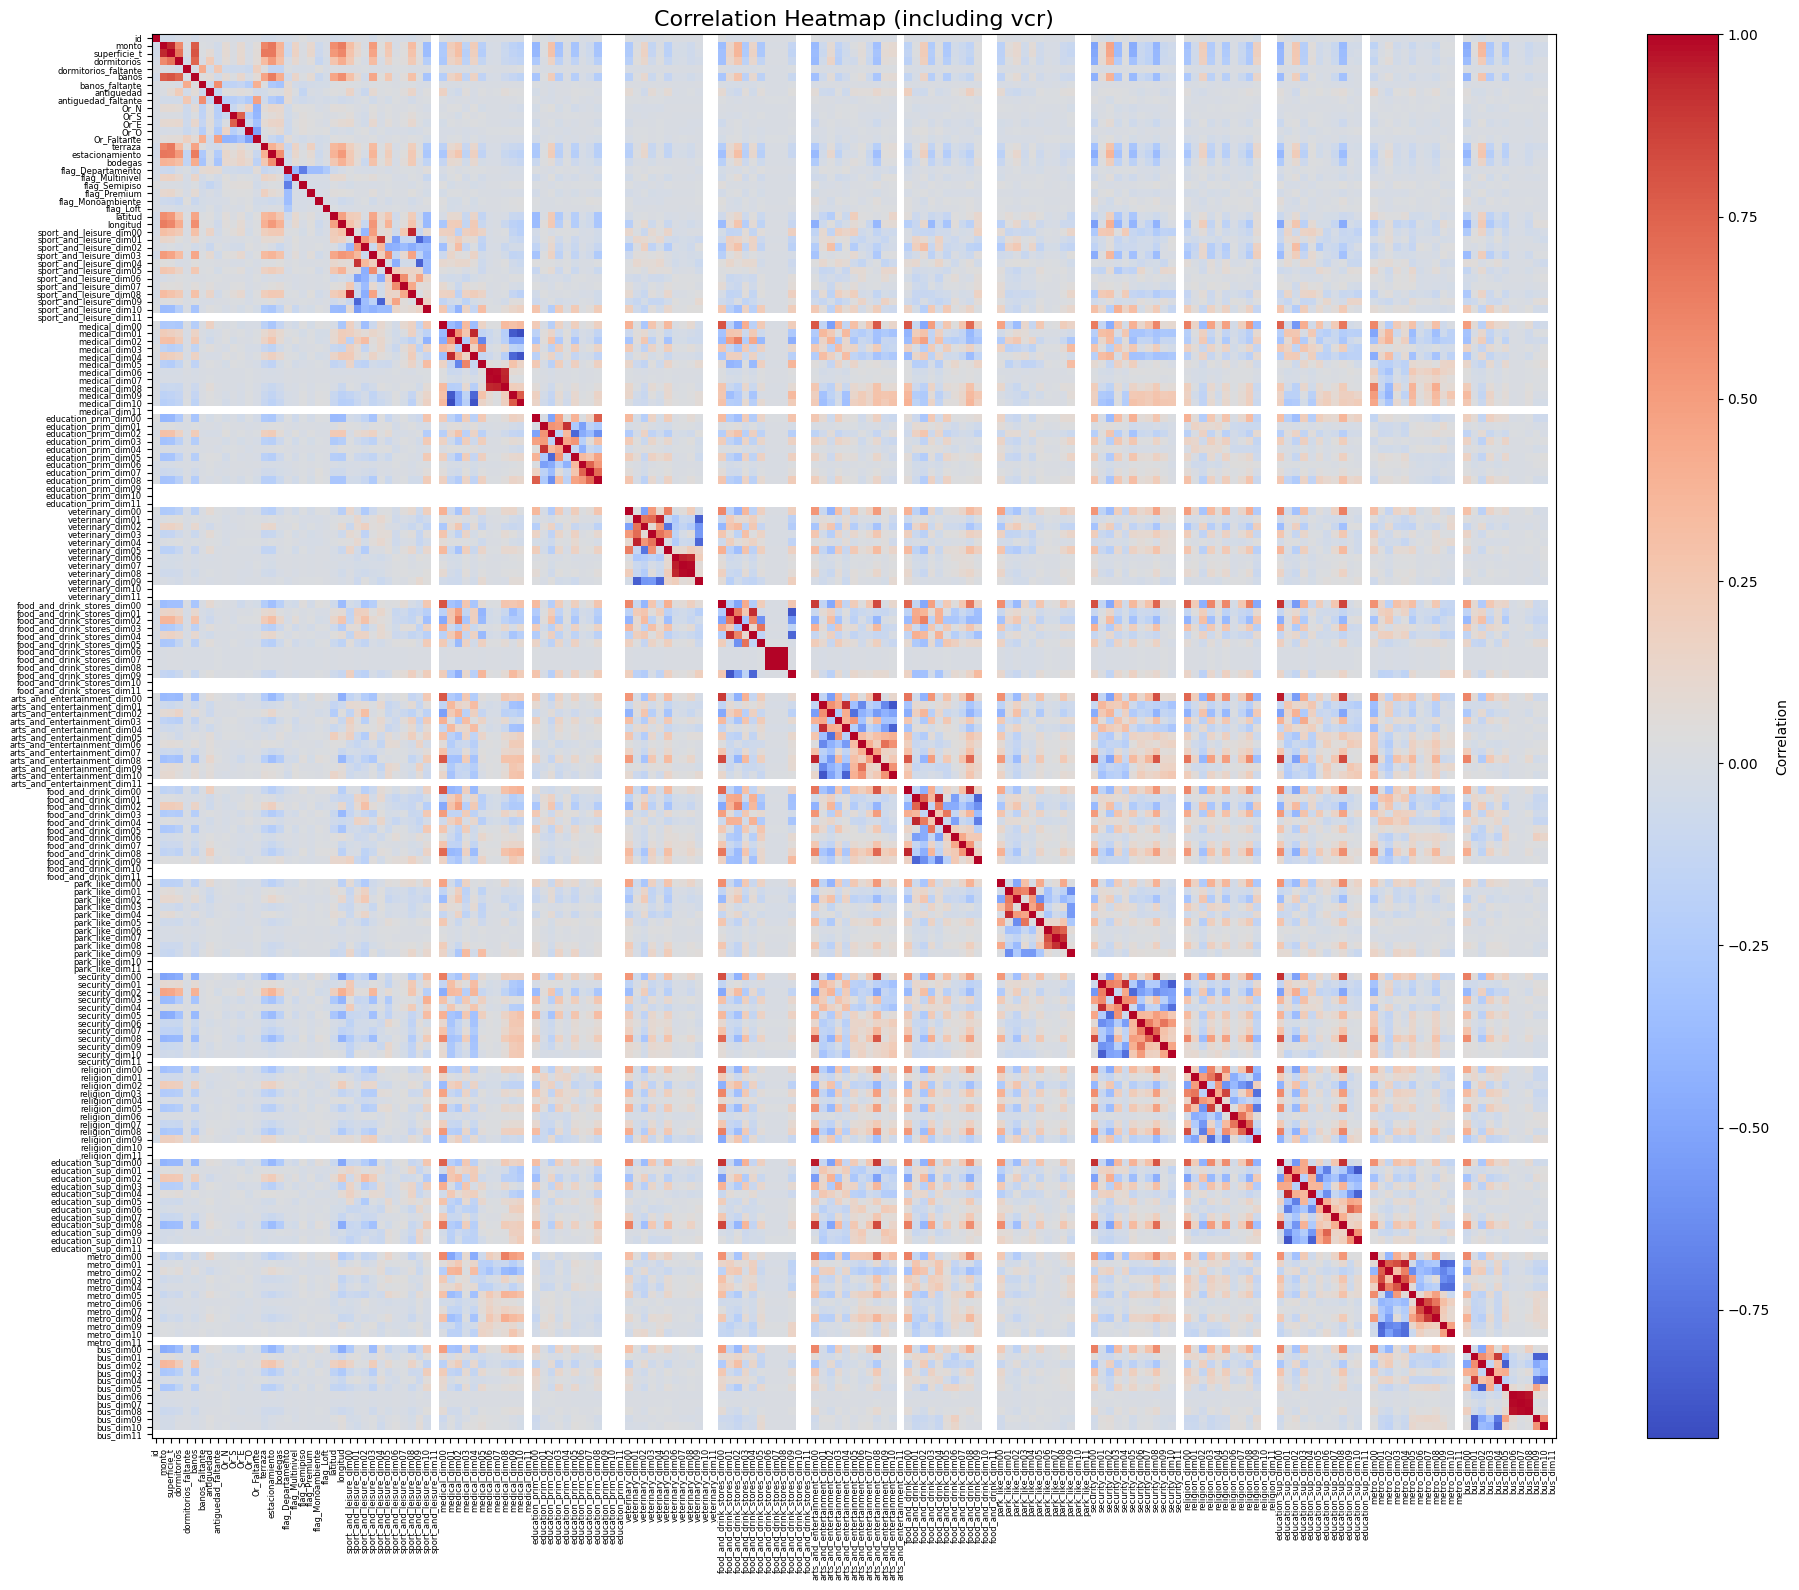

In [4]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include="number")

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Heatmap
plt.figure(figsize=(20, 16))
plt.imshow(corr_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation")
plt.title("Correlation Heatmap (including vcr)", fontsize=16)
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90, fontsize=6)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns, fontsize=6)
plt.tight_layout()
plt.show()
#plt.savefig("corr_matrix.svg")


In [4]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25215 entries, 0 to 25214
Data columns (total 196 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    id                            25215 non-null  int64  
 1    monto                         25215 non-null  int64  
 2    superficie_t                  25215 non-null  float64
 3    dormitorios                   25215 non-null  int64  
 4    dormitorios_faltante          25215 non-null  int64  
 5    banos                         25215 non-null  int64  
 6    banos_faltante                25215 non-null  int64  
 7    antiguedad                    25215 non-null  int64  
 8    antiguedad_faltante           25215 non-null  int64  
 9    Or_N                          25215 non-null  int64  
 10   Or_S                          25215 non-null  int64  
 11   Or_E                          25215 non-null  int64  
 12   Or_O                          25215 non-null

In [5]:
df['monto'].describe()

count    25215.000000
mean      6457.219473
std       6611.545766
min        384.000000
25%       2300.000000
50%       3800.000000
75%       7980.000000
max      90000.000000
Name: monto, dtype: float64

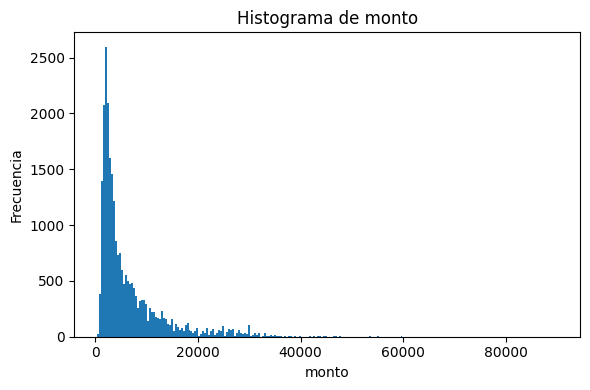

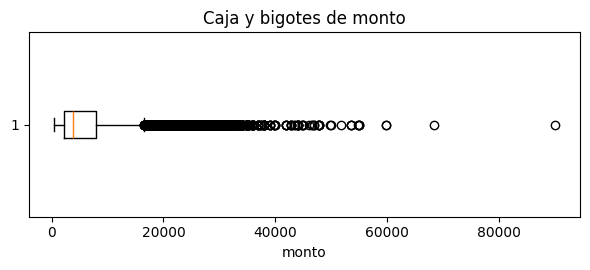

In [5]:
# Histograma
plt.figure(figsize=(6, 4))
plt.hist(df['monto'], bins='auto')
plt.title('Histograma de monto')
plt.xlabel('monto')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Gráfico de caja y bigotes
plt.figure(figsize=(6, 2.8))
plt.boxplot(df['monto'], vert=False, whis=1.5, showfliers=True)
plt.title('Caja y bigotes de monto')
plt.xlabel('monto')
plt.tight_layout()
plt.show()


In [6]:
top10 = df.nlargest(10, 'monto')
top10


,id,monto,superficie_t,dormitorios,dormitorios_faltante,banos,banos_faltante,antiguedad,antiguedad_faltante,Or_N,...,bus_dim02,bus_dim03,bus_dim04,bus_dim05,bus_dim06,bus_dim07,bus_dim08,bus_dim09,bus_dim10,bus_dim11
743,1555792131,90000,286.00,5,0,6,0,9,1,0,...,303.064728,303.064728,303.064728,0.000000,0.003300,0.003300,0.003300,0.0,0.0,1.0
3247,1572716985,68400,375.00,4,0,5,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3248,2813502808,59780,385.00,3,0,4,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3249,1561801431,59730,384.00,3,0,3,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3250,1533371451,55000,378.00,3,0,3,0,9,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3251,1554876151,55000,378.00,3,0,3,0,16,0,1,...,142.447220,183.274124,162.860672,20.413452,0.006238,0.007020,0.012476,1.0,1.0,1.0
3252,1568543553,55000,363.00,3,0,4,0,5,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
744,2837304402,54800,317.00,5,0,5,0,5,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3253,1568422509,53500,399.00,4,0,6,0,3,0,0,...,309.869965,354.870911,332.370438,22.500473,0.003023,0.003227,0.006045,0.0,0.0,1.0
3254,1571999167,53500,398.23,4,0,5,0,1,0,0,...,309.869965,354.870911,332.370438,22.500473,0.003023,0.003227,0.006045,0.0,0.0,1.0


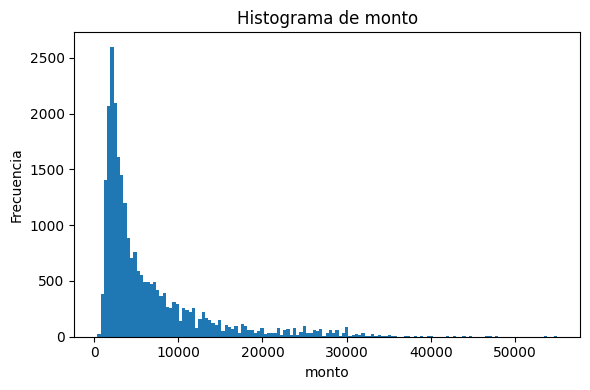

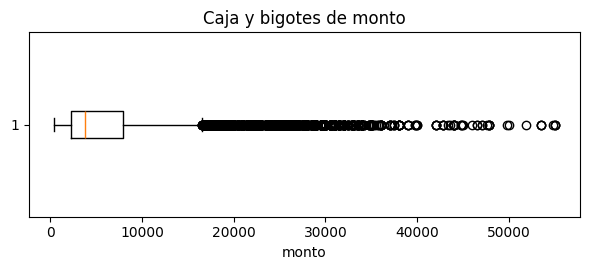

In [6]:
df2 = df[df['monto'] < 56000].copy()
# Histograma
plt.figure(figsize=(6, 4))
plt.hist(df2['monto'], bins='auto')
plt.title('Histograma de monto')
plt.xlabel('monto')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Gráfico de caja y bigotes
plt.figure(figsize=(6, 2.8))
plt.boxplot(df2['monto'], vert=False, whis=1.5, showfliers=True)
plt.title('Caja y bigotes de monto')
plt.xlabel('monto')
plt.tight_layout()
plt.show()


In [8]:
df2['monto'].describe()

count    25211.000000
mean      6447.220618
std       6562.390244
min        384.000000
25%       2300.000000
50%       3800.000000
75%       7980.000000
max      55000.000000
Name: monto, dtype: float64

In [9]:
df2['log_monto']=np.log(df2['monto'])
df2['log_monto'].describe()

count    25211.000000
mean         8.395828
std          0.830310
min          5.950643
25%          7.740664
50%          8.242756
75%          8.984694
max         10.915088
Name: log_monto, dtype: float64

In [10]:
df['log_monto']=np.log(df['monto'])
df['log_monto'].describe()

count    25215.000000
mean         8.396262
std          0.830963
min          5.950643
25%          7.740664
50%          8.242756
75%          8.984694
max         11.407565
Name: log_monto, dtype: float64

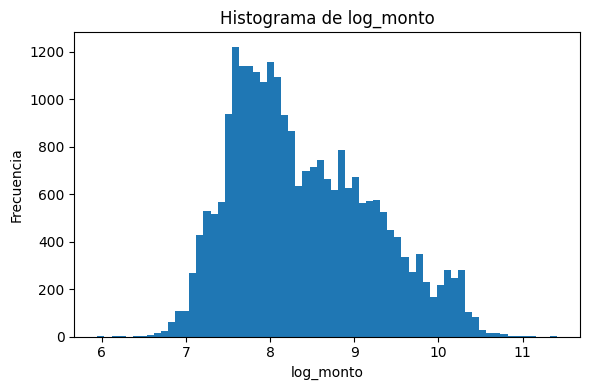

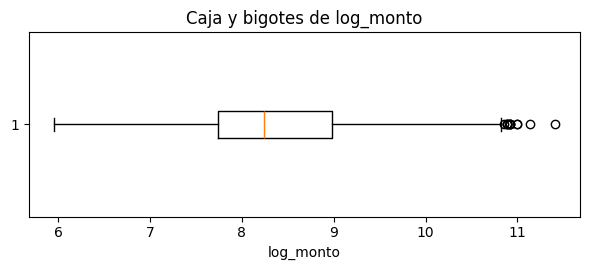

In [ ]:
import matplotlib.pyplot as plt

# Selección y limpieza básica
#s = df['log_monto'].dropna()

# Histograma
plt.figure(figsize=(6, 4))
plt.hist(s, bins='auto')
plt.title('Histograma de log_monto')
plt.xlabel('log_monto')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Gráfico de caja y bigotes
plt.figure(figsize=(6, 2.8))
plt.boxplot(s, vert=False, whis=1.5, showfliers=True)
plt.title('Caja y bigotes de log_monto')
plt.xlabel('log_monto')
plt.tight_layout()
plt.show()


Usaremos log_monto (log natural del precio en UF) como variable objetivo porque los valores de monto presentan una marcada asimetría a la derecha y errores relativos aproximadamente constantes. La transformación log estabiliza la varianza (reduce heterocedasticidad), vuelve la distribución más cercana a lognormal y convierte errores multiplicativos en aditivos en la escala log, mejorando el ajuste y la calibración de intervalos. Además, los coeficientes se interpretan de forma porcentual (p. ej., β≈0,05⇒ ~+5% en el precio) y los outliers altos influyen menos. Para reportar en UF se exponencian las predicciones.

### Posibles modelos, experimentar:
- Baseline lineal (Ridge) con variables “clásicas” (sin geo).
- LGBM-A (clásicas) vs LGBM-B (clásicas + VCR). Probar
- XGB-B (clásicas + VCR). Probar
- Hedónico ElasticNet (log) con todas las numéricas + flags missing.
- MLP (estandarizado). Priorizar
- FT-Transformer (estandarizado).
- kNN geográfico con solo lat, lon (Haversine) como baseline de vecindad.

#### Datasets para distintos modelos:
- DS0: Todas las numericas limpias + lat/lon, y dims de VCR con NaN donde no hay POIs
    - LightGBM
    - XGBoost
- DS1: Variables basicas, sin VCR y optativo lat/lon (con spline para modelos lineales) para evaluar sin nocion geografica. Estandarizar
    - LightGBM 
    - XGBoost
    - Regresion lineal simple
    - Ridge/ElasticNet (hedonico basico)
- DS2: Contiene todo lo de DS0 pero imputando los VCR de POIs faltantes por el radio lejano R3, 0 en las inversas, 0 en los ratios, metro y bus con sus R propios. Flag por clase inidicando presencia o ausencia de POI. Estandarizar
    - LightGBM 
    - XGBoost
    - Regresion lineal 
    - Ridge/ElasticNet (hedonico enriquecido)
    - MLP
    - LinealSVR
    - FT-Transformer
- DS3: DS2 mas z-score a todas las features usadas por modelos sensibles a escala
    - Ridge/ElasticNet
    - Lineal
    - MLP
    - SVR
    - FT-Transformer
- DS4: solo latitud, longitud y superficie_t
    - kNN

R₃ es el radio “lejano” (far) de la banda de distancias que definiste para cada tipo de POI. Es el límite superior del área de búsqueda: más allá de R₃ ya no se buscaron POIs.

Generales (salud, educación, etc.): R₁=600 m, R₂=1200 m, R₃=2400 m.
Bus: R₁=100 m, R₂=200 m, R₃=400 m.
Metro: R₁=200 m, R₂=400 m, R₃=800 m.

¿Por qué imputar con R₃ cuando “no hay POIs”?
Porque significa “no encontré nada dentro del radio máximo que consideré”. Entonces:
count_pois = 0
Distancias (min/mean/median/max) = R₃ de esa clase ⇒ “lo más cercano está al menos a R₃ (o fuera)”.
Inversas (mean_inv, max_inv, sum_inv) = 0 ⇒ no hay cercanía acumulada.
Ratios (≤R₁, ≤R₂, ≤R₃) = 0, 0, 0.
(Opcional) flag_missing=1 para esa clase.
Esto mantiene la semántica y la monotonía (más lejos = peor “accesibilidad”) y evita meter NaN o distancias infinitas que rompan los modelos.